## 1. Why Python?

- high-level language
- gerneral-purpose language
- interpreted language
- has numerous third-parth libaries
- has many users (find solutions easily)

## 2. Open-source packages that commonly used in ATMOS field:
### * Scientific Python packages:
- [Numpy](https://numpy.org/)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/)
- [Matplotlib](https://matplotlib.org/) <-- required for Plotting
- [Cartopy](https://scitools.org.uk/cartopy/docs/latest/) <-- recommended for Maps
- [netcdf4-python](http://unidata.github.io/netcdf4-python/) <-- for reading or writing netCDF files
- [xarray](http://xarray.pydata.org/en/stable/) <-- Xarray introduces labels in the form of dimensions, coordinates and attributes on top of raw NumPy-like multidimensional arrays, which allows for a more intuitive, more concise, and less error-prone developer experience.

### * Python packages for Atmospheric sciences:
- [MetPy](https://unidata.github.io/MetPy/latest/) <-- for reading, visualizing, and performing calculations with weather data
- [Siphon](https://unidata.github.io/siphon/latest/) <--  a collection of Python utilities for downloading data from remote data services
- [wrf-python](https://wrf-python.readthedocs.io/en/latest/) <-- for analyzing WRF model data


### * Some other useful resources:
- [PyNIO & PyNGL](http://www.pyngl.ucar.edu/index.shtml) <-- for reading GRIB and other geoscience specific file formats. Note that PyNIO is not available for Windows and that the PyNIO backend may be moved outside of xarray in the future.

- [zarr](https://zarr.readthedocs.io/en/stable/) <-- for chunked, compressed, N-dimensional arrays.
- [rasterio](https://github.com/rasterio/rasterio) for reading GeoTiffs and other gridded raster datasets.
- [cfgrib](https://github.com/ecmwf/cfgrib) <-- for reading GRIB files via the ECMWF ecCodes library.

and many many other packages ...

## 3. Installing Python
1. Get anaconda from [anaconda](https://www.anaconda.com/products/individual), Scroll down to the "Anaconda for OS X" portion of the web page. 
2. Click on the "Mac OS X 64 bit Graphical Installer" and download the Python 3.5 version for Mac X, and click on the "Windows 64 bit Graphical Installer" for Windows.



## 4. Recommend JupyterLab instead of Jupyter notebook
- Run [Jupyter notebook](https://jupyter.org/)
- Run [Jupeter lab](https://jupyterlab.readthedocs.io/en/stable/)

## 5. Use Jupyter to download files from Husile's Google Drive

In [1]:
# pip install --upgrade google-api-python-client google-auth-httplib2 google-auth-oauthlib

In [1]:
import glob
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

### NCEP/NCAR reanalysis data [download](https://psl.noaa.gov/data/gridded/data.ncep.reanalysis2.html)
1. create a directory to save the data using: mkdir ncep/pressure_level
2. get into your new directory using: cd ncep/pressure_level
3. download the data using [wget](https://www.geeksforgeeks.org/wget-command-in-linux-unix/)
  - specifically, right click on the dataset that you need to download, copy link address
  - go back to your terminal ncep/pressure_level directory
  - type wget and paste the weblink 
  - press enter
  
### You can use Husile's data for this excersice if you don't want to use your storage space

Let's get started

In [7]:
#FOLDER_PATH = "../data/"
import glob
fname = f"/uufs/chpc.utah.edu/common/home/strong-group4/husile/data_in/ncep/pressure_level/air*"
file = sorted(glob.glob(fname)) 
file

['/uufs/chpc.utah.edu/common/home/strong-group4/husile/data_in/ncep/pressure_level/air.mon.mean.nc']

In [8]:
air_dat = xr.open_dataset(file[0])

In [9]:
air_dat

<xarray.Dataset>
Dimensions:  (level: 17, lat: 73, lon: 144, time: 891)
Coordinates:
  * level    (level) float32 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2022-03-01
Data variables:
    air      (time, level, lat, lon) float32 ...
Attributes:
    description:     Data from NCEP initialized reanalysis (4x/day).  These a...
    platform:       Model
    Conventions:    COARDS
    NCO:            20121012
    history:        Mon Jul  5 21:45:36 1999: ncrcat air.mon.mean.nc /Dataset...
    title:          monthly mean air from the NCEP Reanalysis
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

In [10]:
level = air_dat.level
lat = air_dat.lat
lon = air_dat.lon
air = air_dat.air
# lat

In [11]:
air

<xarray.DataArray 'air' (time: 891, level: 17, lat: 73, lon: 144)>
[159225264 values with dtype=float32]
Coordinates:
  * level    (level) float32 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2022-03-01
Attributes:
    long_name:     Monthly Mean of Air temperature
    units:         degC
    precision:     2
    var_desc:      Air Temperature
    level_desc:    Multiple levels
    statistic:     Mean
    parent_stat:   Other
    valid_range:   [-200.  300.]
    dataset:       NCEP Reanalysis Derived Products
    actual_range:  [-108.64999    43.959667]

In [12]:
mon = air['time.month']==7
air_jul = air.where(mon,drop=True)
type(air_jul)
# air_jul

xarray.core.dataarray.DataArray

In [13]:

air_jja = air.where(air['time.season']=='JJA',drop=True)
type(air_jja)
# air_jja

xarray.core.dataarray.DataArray

In [14]:
# interpolate data 
level_interp = np.arange(50,1050.,100.)
air_interped_dataset = air_jja.interp(level=level_interp,method='linear',kwargs=dict(fill_value='extrapolate'))
# air_interped_dataset

In [15]:
air_interp_lower_vars = air_interped_dataset.sel(level=950.0, )
# air_interp_lower_vars

In [17]:
air_interp_mn = air_interp_lower_vars.mean()
air_interp_mn


<xarray.DataArray 'air' ()>
array(6.55036983)
Coordinates:
    level    float64 950.0

## calculate averaged surface air temperature along time dimention (JJA mean)

In [18]:
air_interp_dim_mn = air_interp_lower_vars.mean('time')
# air_interp_dim_mn

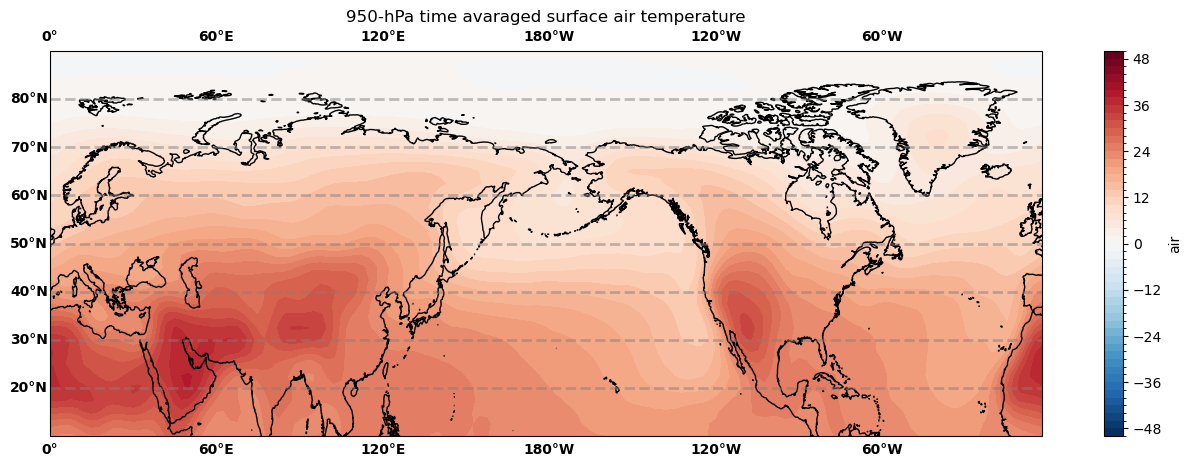

In [19]:
import cartopy.crs as ccrs
import cartopy.feature as cfeat

# fig, ax = plt.subplots(figsize=(16,10))
# cs = air_interp_dim_mn.plot.contourf( ax=ax,x = 'lat',y = 'lon',robust=True)
# gl = ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True,
#                  linewidth=2, color='gray',alpha=0.5, linestyle='--')

from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

proj = ccrs.PlateCarree(central_longitude=180.0)
src_crs = ccrs.PlateCarree()
fig = plt.figure(figsize=(16,5))
ax = fig.add_subplot(111,projection=proj,aspect='auto')
lvls=np.arange(-50,50.1,2)
cs = air_interp_dim_mn.plot.contourf(levels=lvls,ax=ax,x='lon',robust=True,
                           transform=src_crs,cmap=plt.cm.RdBu.reversed()) 

gl = ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True,
                 linewidth=2, color='gray',alpha=0.5, linestyle='--')
gl.xlabel_top = False
gl.xlines = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 15, 'color': 'gray'}
gl.xlabel_style = {'color': 'k', 'weight': 'bold'}
gl.ylabel_style = {'size': 15, 'color': 'gray'}
gl.ylabel_style = {'color': 'k', 'weight': 'bold'}
ax.set_xlabel('Latitude (degrees north)')
ax.set_title('950-hPa time avaraged surface air temperature')


ax.set_ylim([10,90])
ax.coastlines(resolution='50m')

plt.show()
